# GRB 250704B Observations

In [67]:
import astropy.units as u
import astropy.cosmology.units as cu
import math
import numpy as np

z = 0.661 * cu.redshift
fluence = 4.24E-06 *u.erg/u.cm**2 # In 20-10000 keV band. 
T_90 = 0.68 * u.second

# Distance calculation

In [68]:

d = z.to(u.cm, cu.redshift_distance(kind="luminosity"))
print (f"GRB luminosity distance = {d:.2E}")


GRB luminosity distance = 1.26E+28 cm


# Energy based on Fluence   

In [96]:
E_iso = fluence * 4 * math.pi * d**2 / (1 +z)
print (f"GRB 250704B E_iso inferred from fluence = {E_iso:.2E}")


GRB 250704B E_iso inferred from fluence = 5.11E+51 erg


# Optical plateau observed


In [97]:
t_opt_plateau = 10**5 * u.second
flux_opt_plateu = 10**-2 * u.mJy
optical_freq_band = 1E14 * u.Hz

total_flux_opt_plateau = t_opt_plateau * flux_opt_plateu * optical_freq_band
E_iso_opt_plateau = total_flux_opt_plateau * 4 * math.pi * d ** 2
E_iso_opt_plateau = E_iso_opt_plateau.to(u.erg)
print(f"GRB 250704B E_iso estimated from optical plateau = {E_iso_opt_plateau:.2E}")

GRB 250704B E_iso estimated from optical plateau = 2.00E+48 erg


# GRB 130912A 


In [93]:
d = (0.661*cu.redshift).to(u.cm, cu.redshift_distance(kind="luminosity"))

t_opt_plateau = 2*10**4 * u.second
flux_opt_plateu = 10**-3 * u.mJy
optical_freq_band = 1E14 * u.Hz

total_flux_opt_plateau = t_opt_plateau * flux_opt_plateu * optical_freq_band
E_iso_opt_plateau = total_flux_opt_plateau * 4 * math.pi * d ** 2
E_iso_opt_plateau = E_iso_opt_plateau.to(u.erg)
print(f"# GRB 130912A E_iso estimated from optical plateau = {E_iso_opt_plateau:.2E}")

# GRB 130912A E_iso estimated from optical plateau = 4.00E+46 erg


# X-ray emission

In [98]:
start_time = 2E3 * u.second
end_time = 2E5 * u.second
duration = end_time - start_time
duration_days = duration.to(u.day)
#print(f"duration={duration_days:.1f}")

start_flux = (1E-11 * 3600 * 24 * u.erg / (u.cm**2 * u.day))
end_flux = 2E-13 * 3600 * 24 * u.erg / (u.cm**2 * u.day)

alpha = -np.log(end_flux/start_flux)/np.log(end_time/start_time)
print(f"alpha={alpha:.2f}")

integral_flux = start_flux/((1+alpha)*start_time**alpha)*(end_time**alpha)
#print(f"integral_flux={integral_flux:.2E}")

E_xray = integral_flux * 4 * math.pi * d ** 2
print(f"GRB 250704B E_iso estimated for X-ray = {E_xray:.2E}")


alpha=0.85
GRB 250704B E_iso estimated for X-ray = 4.67E+52 erg / d


# Plateau duration estimate as a function of viscosity and remnant mass

In [83]:
visc = [1e-3, 1e-2, 1e-1, 1]
remnant_mass = [1, 1e1, 1e2, 1e3]

print(f"Plateu duration in days as function of viscosity and remnant mass:")
print("=" * 70)
# Print header row
header = f"{'Visc ↓ / Mass →':>15}" + "".join([f"{m:>15.0f}" for m in remnant_mass])
print(header)
print("-" * len(header))

# Print each row: viscosity as row header, durations as entries
for v in visc:
    row = f"{v:15.3f}"
    for m in remnant_mass:
        plateu_duration = (100 * u.second * ((v/0.1)**-1.8)*(m**1.8)).to(u.day).value
        row += f"{plateu_duration:15.1f}"
    print(row)


Plateu duration in days as function of viscosity and remnant mass:
Visc ↓ / Mass →              1             10            100           1000
---------------------------------------------------------------------------
          0.001            4.6          290.7        18343.7      1157407.4
          0.010            0.1            4.6          290.7        18343.7
          0.100            0.0            0.1            4.6          290.7
          1.000            0.0            0.0            0.1            4.6


# Plot the lightcurve


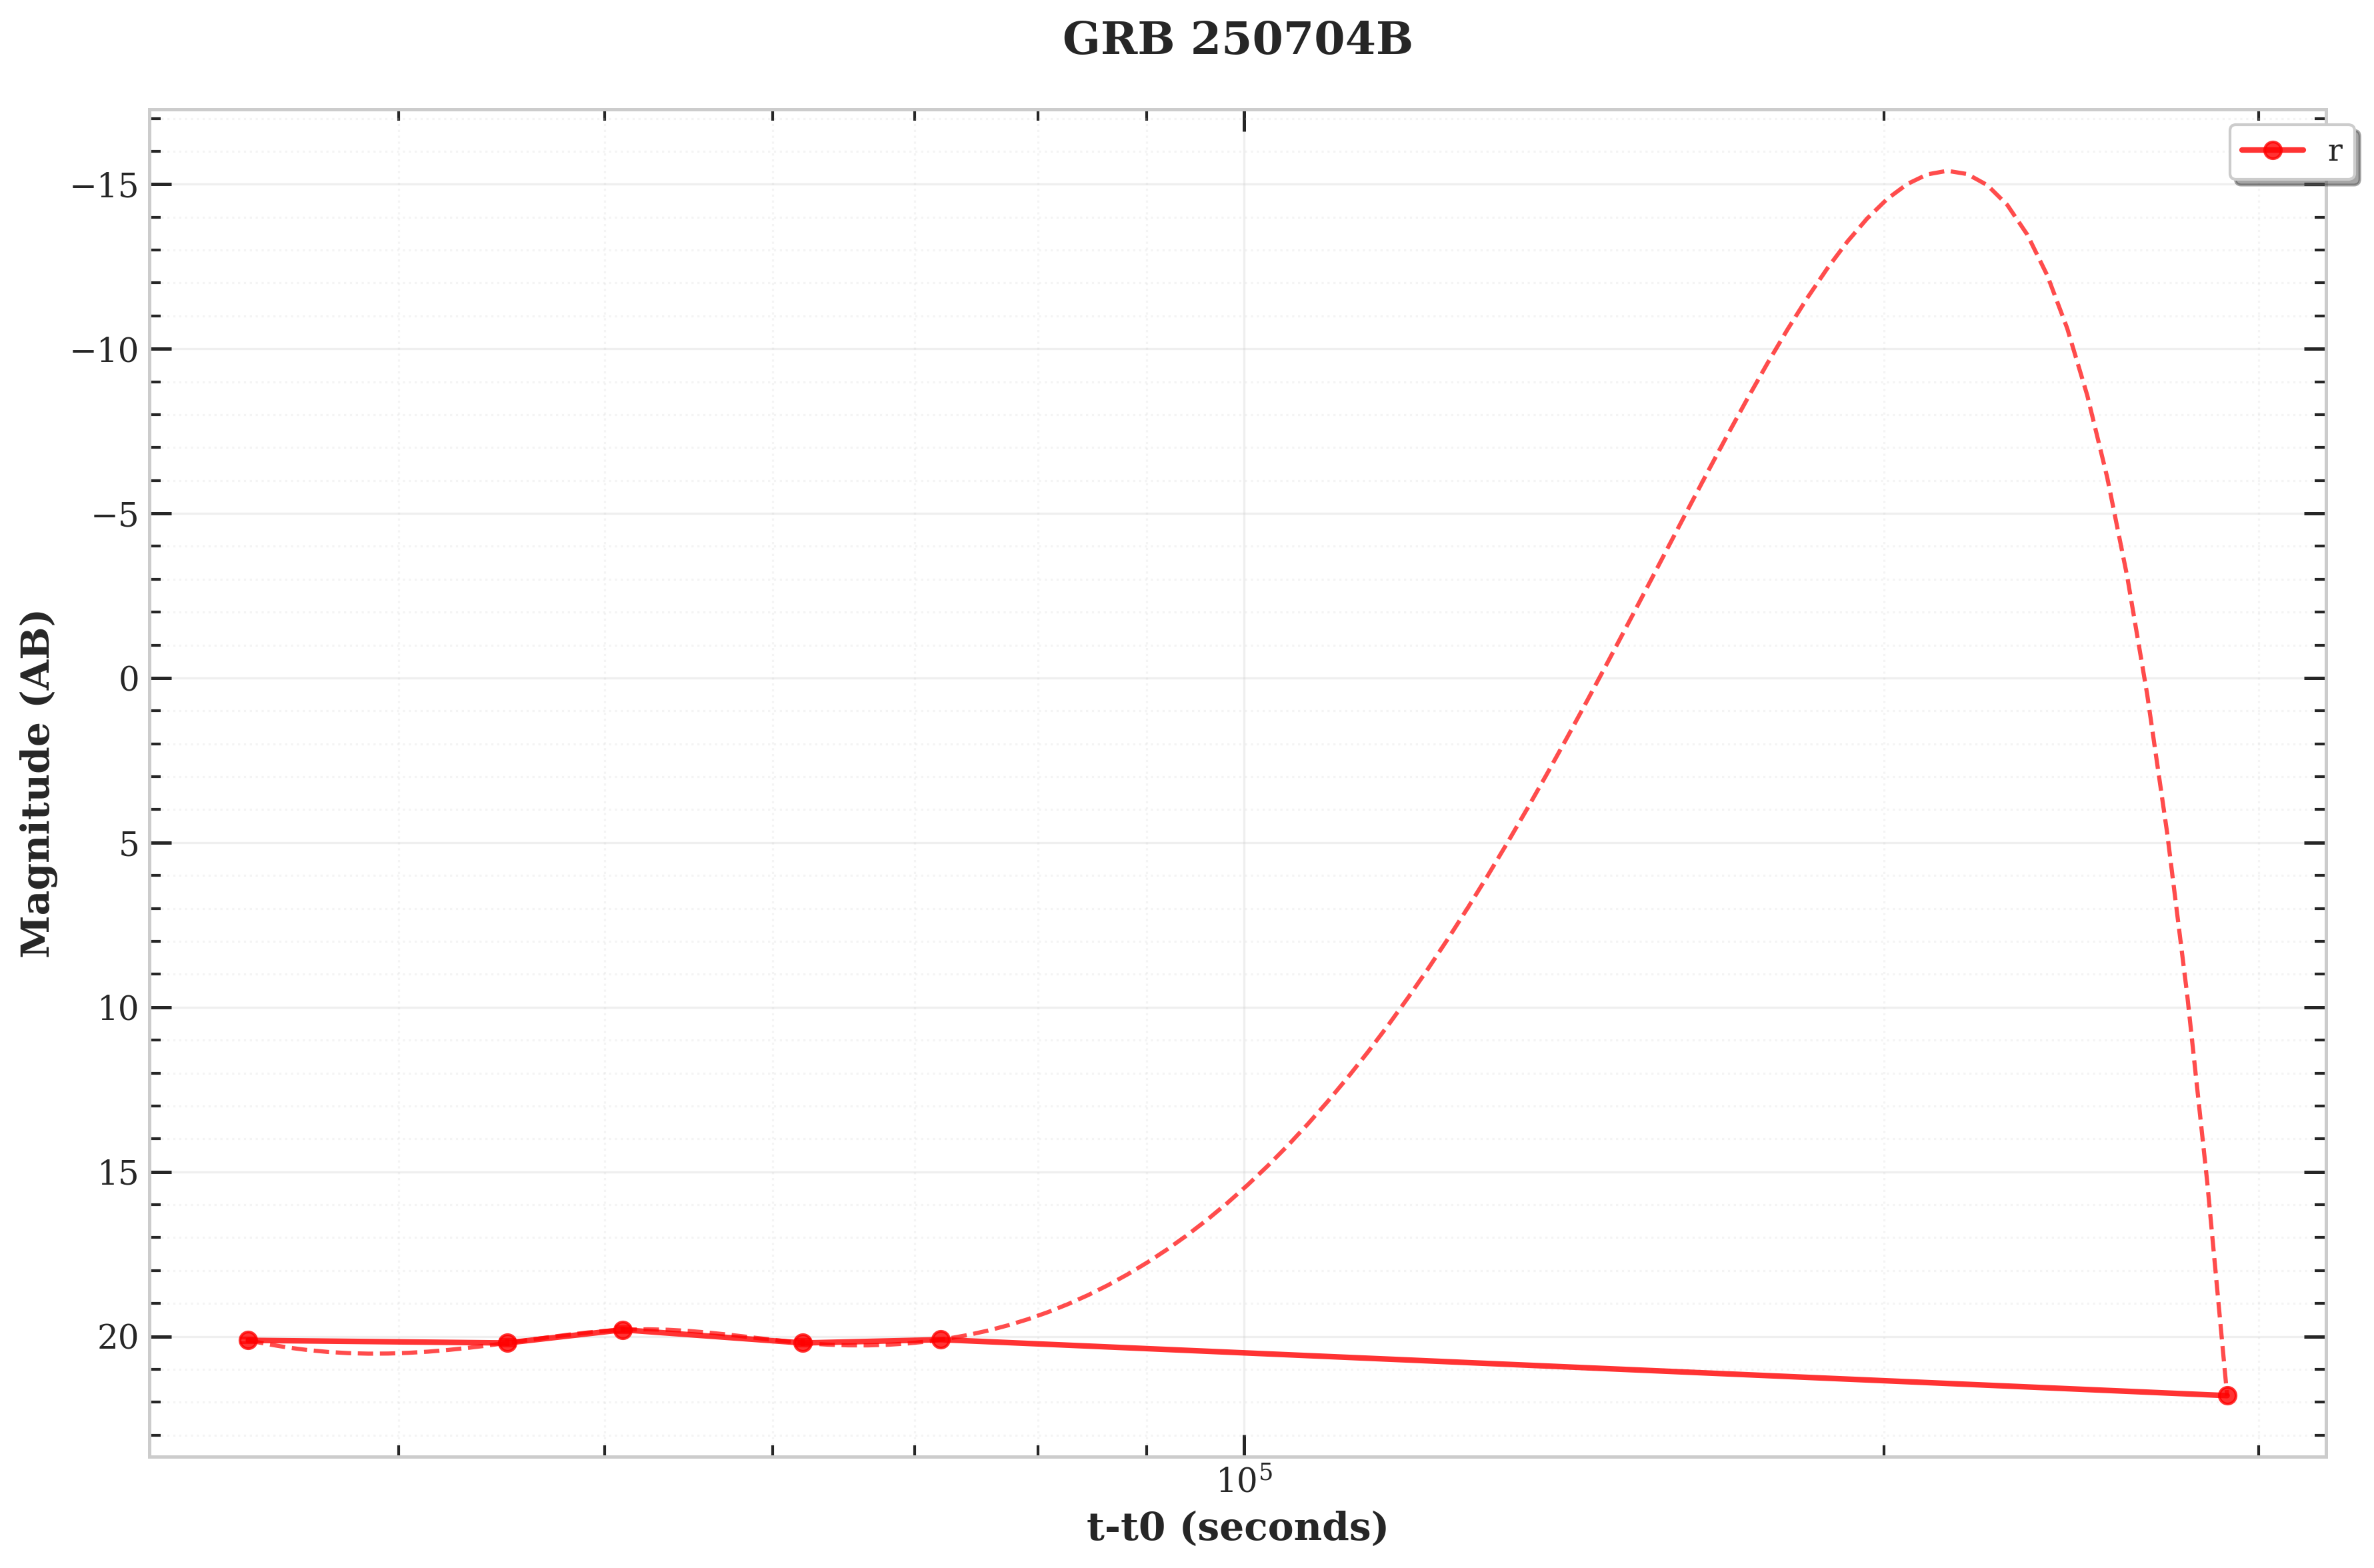

Data loaded successfully!
Number of data points: 21
Frequency bands found: ['r', 'v', 'i', 'J', 'g', 'R', '10GHz', '6GHz', '1.3GHz']
Time range: 3.4e+04 to 4.9e+05 seconds
Magnitude range: 18.46 to 22.90
Plot saved as: plots/GRB 250704B - lightcurve_lightcurve.pdf


In [7]:
import grb_lightcurve_plot as grbplot
import importlib
importlib.reload(grbplot)
grbplot.plot_lightcurve(
    title='GRB 250704B',
    csv_filename='data/GRB 250704B - lightcurve.csv',
    x_col='t-t0 (seconds)',
    y_col='Magnitude (AB)',
    error_col='Error bar (Mag)',
    frequency_col='Frequency Band',
    fit_spline=True
)

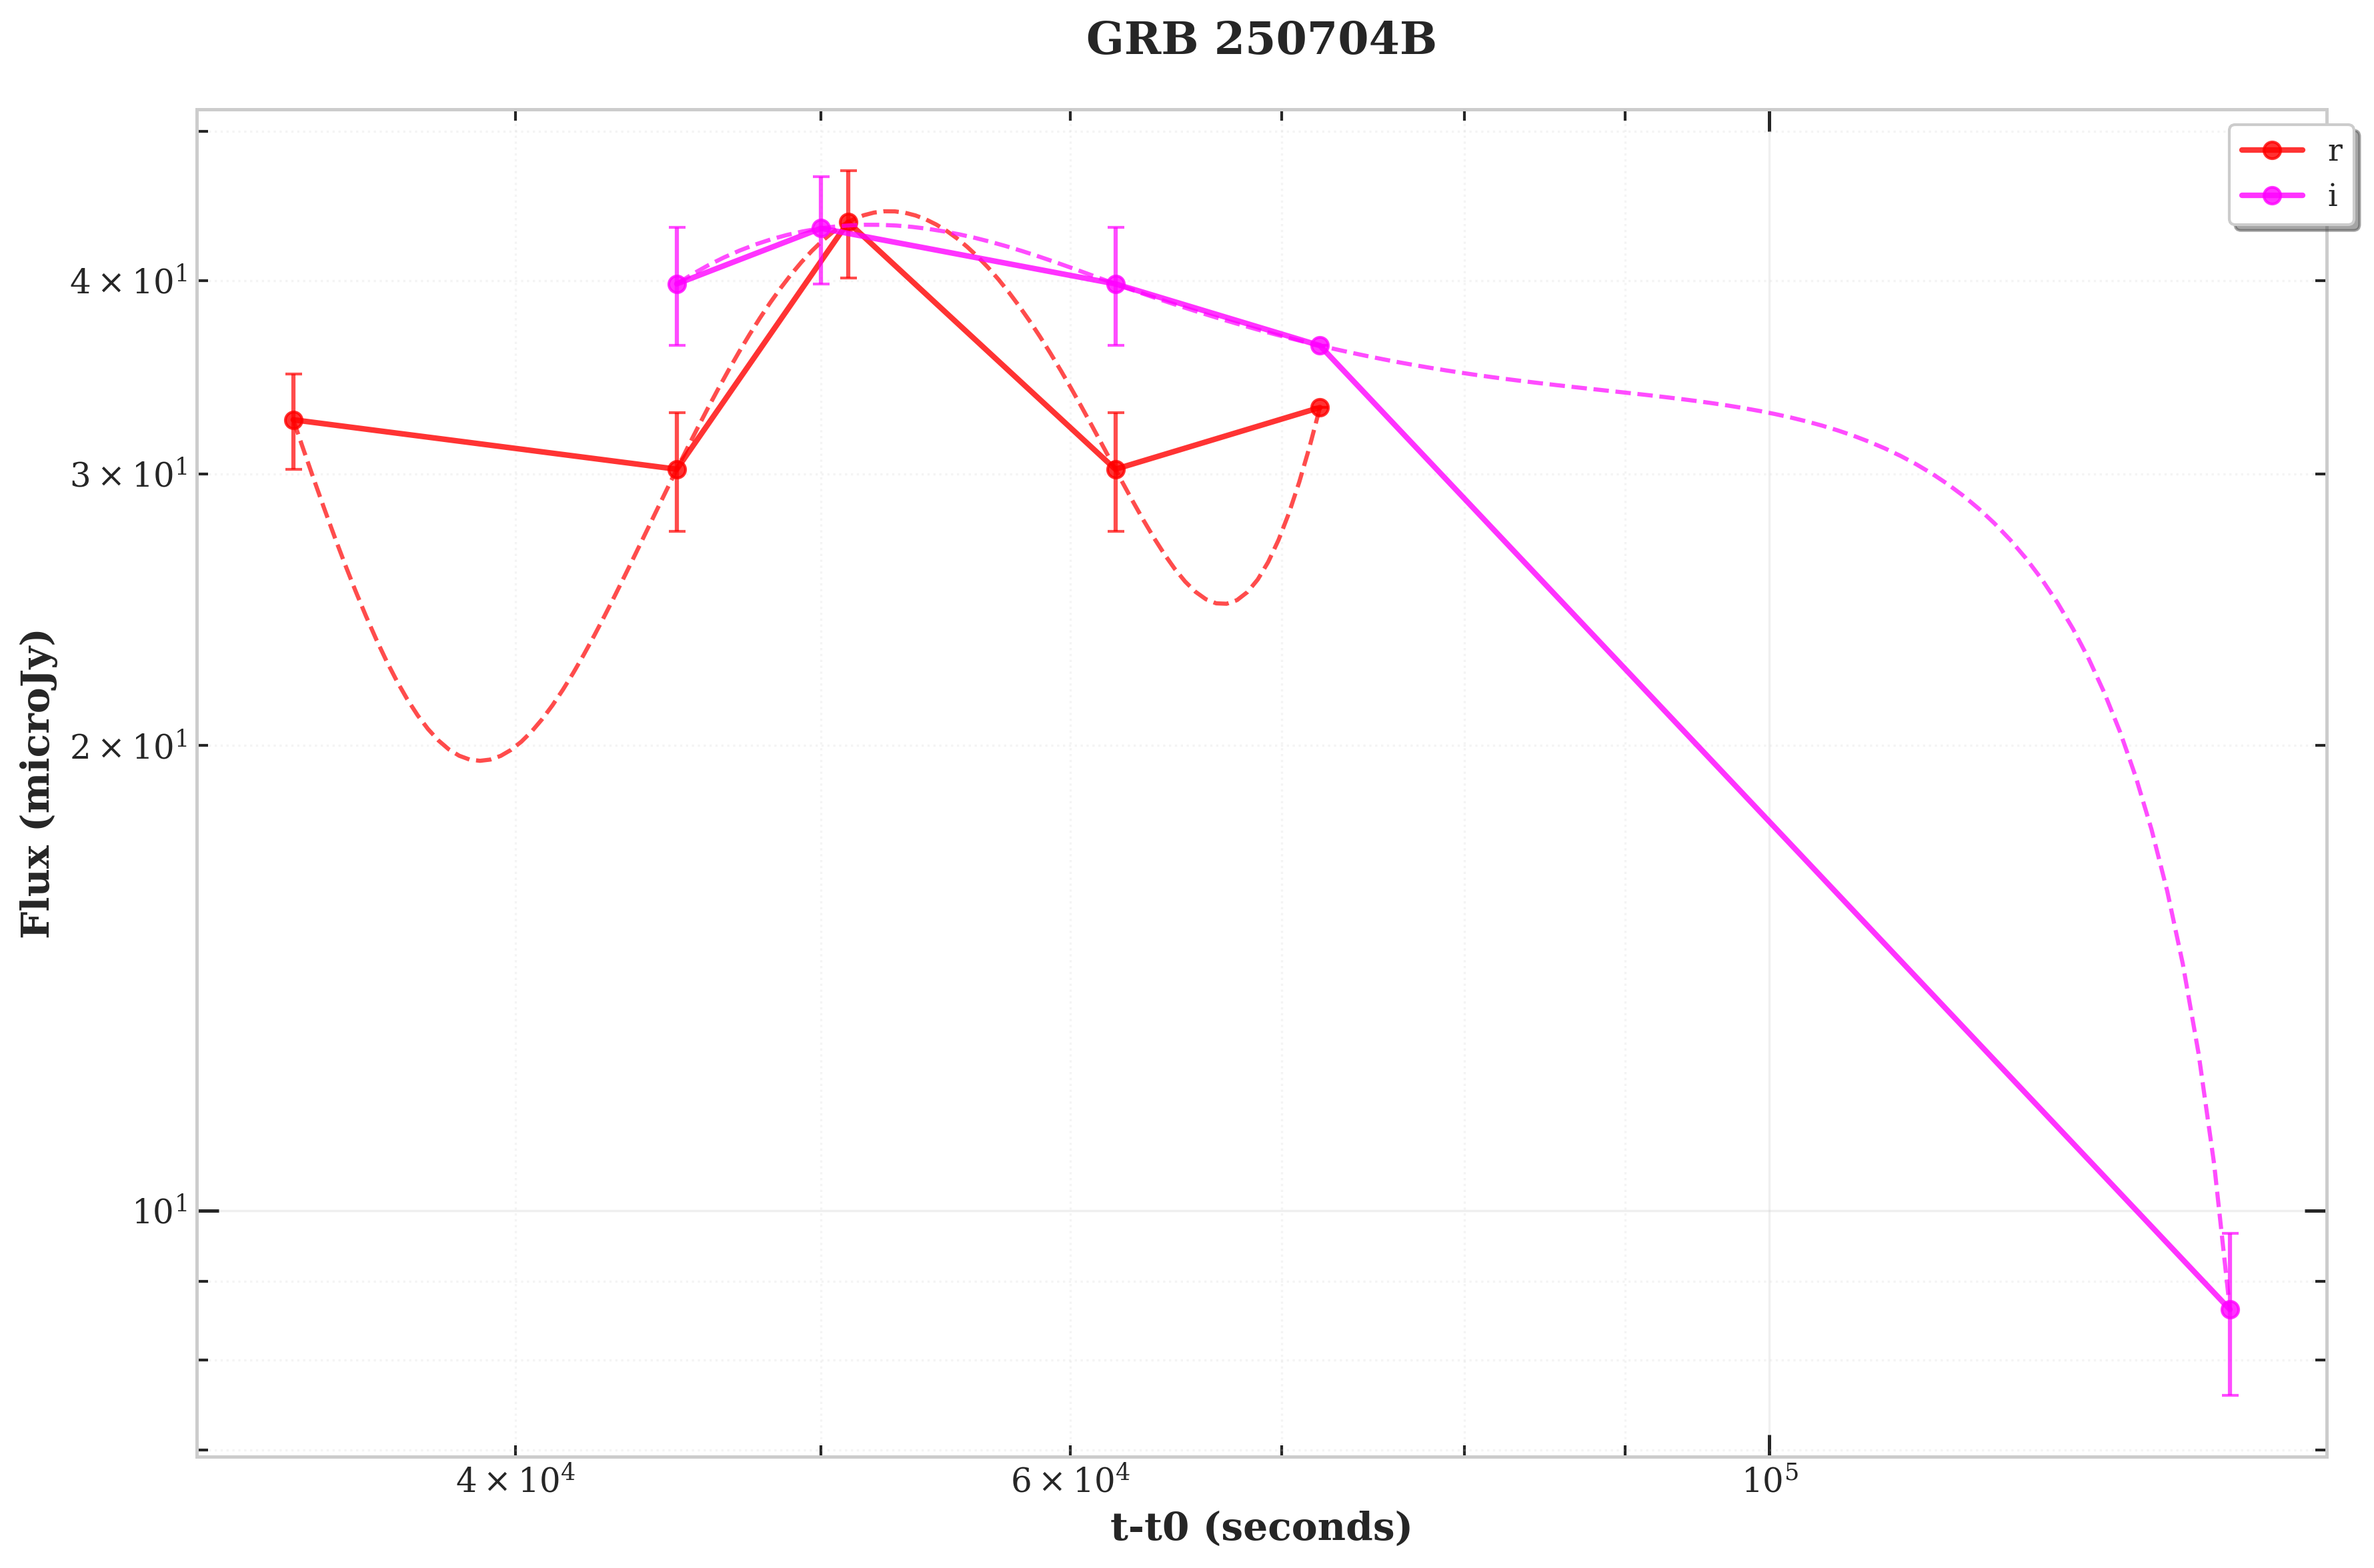

Data loaded successfully!
Number of data points: 21
Frequency bands found: ['r', 'v', 'i', 'J', 'g', 'R', 'ru', '10GHz', '6GHz', '1.3GHz']
Time range: 3.4e+04 to 4.9e+05 seconds
Magnitude range: 2.51 to 150.00
Plot saved as: plots/GRB 250704B - lightcurve_lightcurve.pdf


In [12]:
import grb_lightcurve_plot as grbplot
import importlib
importlib.reload(grbplot)
grbplot.plot_lightcurve(
    title='GRB 250704B',
    csv_filename='data/GRB 250704B - lightcurve.csv',
    x_col='t-t0 (seconds)',
    y_col='Flux (microJy)',
    error_col='Error bar (Flux)',
    frequency_col='Frequency Band',
    fit_spline=True,
    invert_y=False,
    selected_bands=['r','i'],
    yscale='log',
)

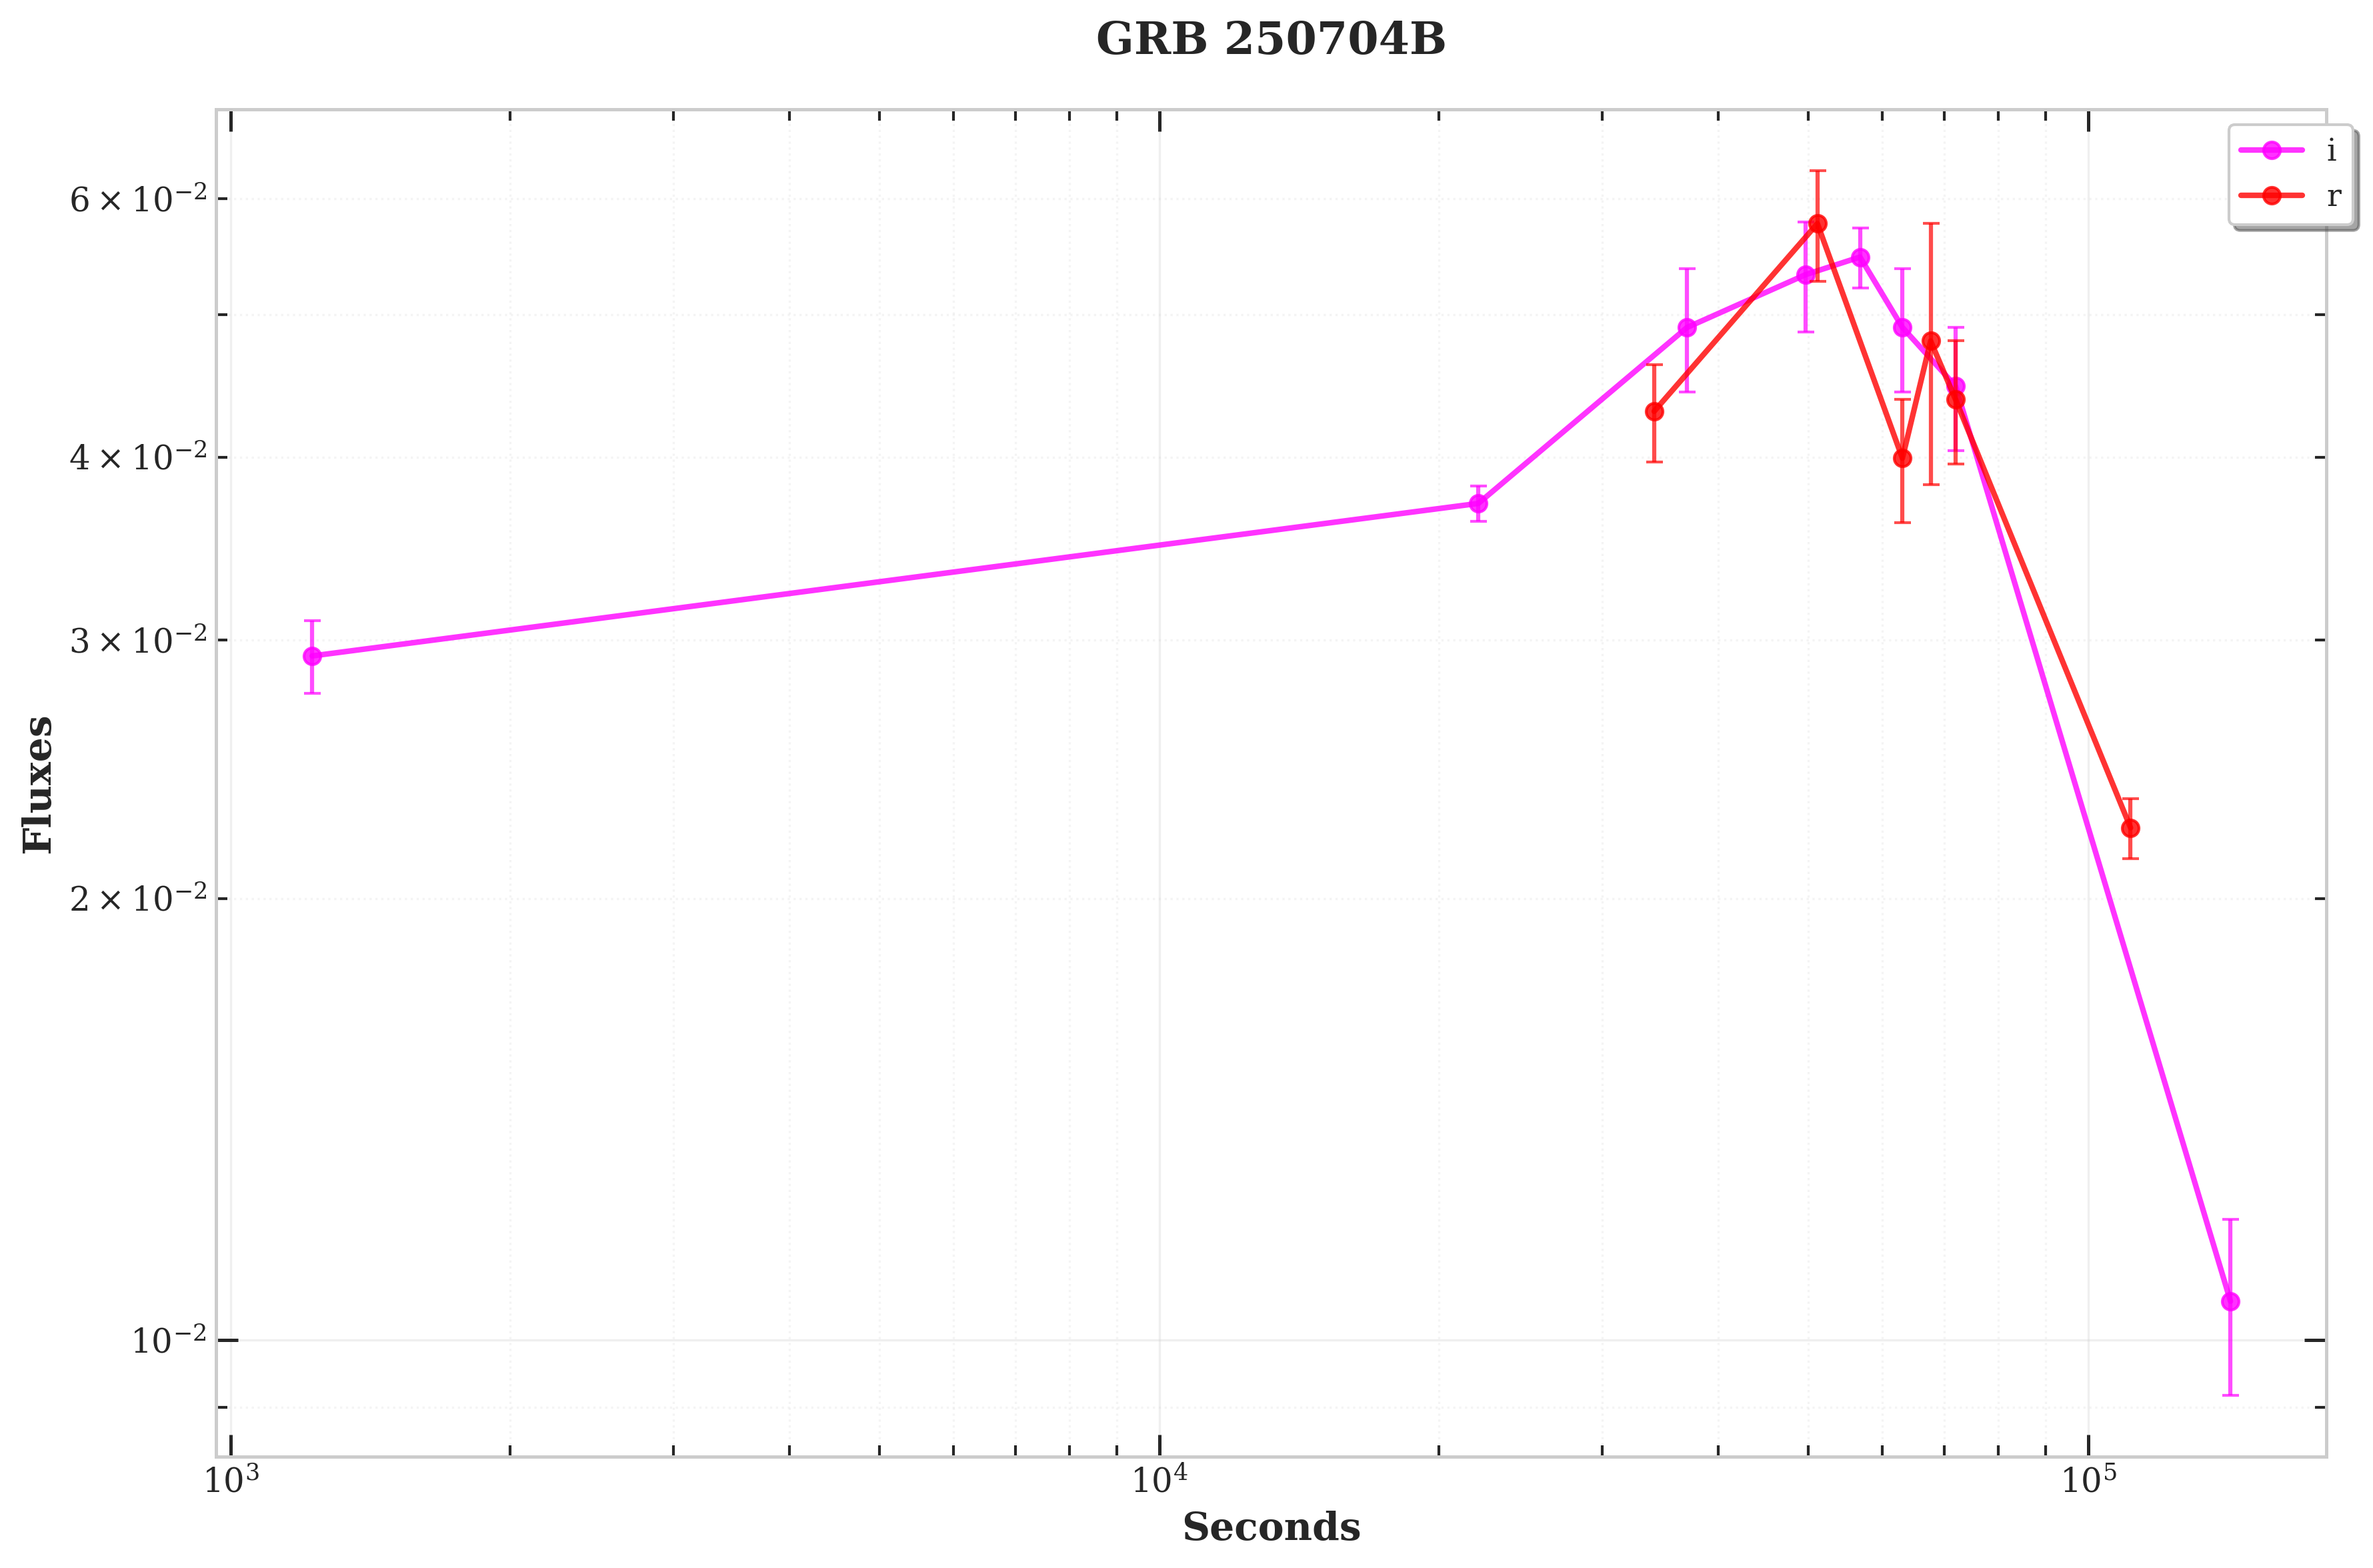

Data loaded successfully!
Number of data points: 23
Frequency bands found: ['i', 'z', 'VT_B', 'VT_R', 'r', 'J', 'g', 'R']
Time range: 1.2e+03 to 4.6e+05 seconds
Magnitude range: 0.00 to 0.07
Plot saved as: plots/EP250704a_final_extinct_corr_lightcurve.pdf


In [15]:
import grb_lightcurve_plot as grbplot
import importlib
importlib.reload(grbplot)
grbplot.plot_lightcurve(
    title='GRB 250704B',
    csv_filename='data/EP250704a_final_extinct_corr.csv',
    x_col='Seconds',
    y_col='Fluxes',
    error_col='FluxErrs',
    frequency_col='Filt',
    fit_spline=False,
    invert_y=False,
    selected_bands=['r','i'],
    yscale='log',
)